In [1]:
!which python

/home/tvdiep/anaconda3/envs/p4ds-env/bin/python


## Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd

## Thu thập dữ liệu

Dữ liệu chúng em sử dụng ở đây bao gồm 3268 sản phẩm của Nike và Adidas với 12 thông tin đi kèm như: ratings, discount, sales prices, listed price,...

## Khám phá dữ liệu

### Đọc dữ liệu vào Dataframe

In [3]:
sale_data = pd.read_csv("https://raw.githubusercontent.com/tvadiep/P4DS_FinalProject/main/Adidas_Nike.csv")

In [4]:
sale_data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


### Dữ liệu có bao nhiêu dòng, bao nhiêu cột

In [5]:
data_rows = sale_data.shape[0]
data_cols = sale_data.shape[1]
print('Dữ liệu có dòng {} và {} cột'.format(data_rows, data_cols))

Dữ liệu có dòng 3268 và 10 cột


### Mỗi dòng có ý nghĩa gì?

Mỗi dòng ở đây là thông tin của một sản phẩm

### Kiểm tra xem các dòng có bị lặp không?

In [6]:
num_duplicated_rows = sale_data.duplicated().sum()
if num_duplicated_rows == 0:
    print('Không có dòng nào bị lặp')
else:
    print('Có {} dòng bị lặp'.format(num_duplicated_rows))

Không có dòng nào bị lặp


### Mỗi cột có ý nghĩa gì?

* Product Name: Tên sản phẩm.
* Product ID: Id sản phẩm.
* Listing Price: Giá niêm yết.
* Sale Price: Giá bán.
* Discount: Giảm giá.
* Brand: Nhãn hiệu.
* Description: Mô tả.
* Rating: Đánh giá.
* Reviews: Số lượt nhận xét
* Last Visited: Thời điểm ghi nhận dữ liệu.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [7]:
sale_data.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Description       object
Rating           float64
Reviews            int64
Last Visited      object
dtype: object

### Cột có dtype là object nghĩa là sao?

In [8]:
sale_data.select_dtypes('object')

,Product Name,Product ID,Brand,Description,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,2020-04-13T15:06:15
...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,Nike,The Air Jordan 8 Retro recaptures the memorabl...,2020-04-13T15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,Nike,The Nike Phantom Venom Club IC is engineered f...,2020-04-13T15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,Nike,The soft upper of the Nike Mercurial Superfly ...,2020-04-13T15:41:07
3266,Nike Air Max 98,AH6799-300,Nike,The Nike Air Max 98 features the OG design lin...,2020-04-13T15:41:19


## Tiền xử lý

### Vấn đề cần tiền xử lý:

#### Đầu tiên chúng ta xem thử có các kiểu dữ liệu nào trong mỗi cột có dtype là object

In [9]:
def open_object_dtype(s):
    dtype_list = s.apply(type)
    dtypes = set(dtype_list)
    return dtypes

In [10]:
cate_col_df = sale_data.select_dtypes(include='object').columns
type_col = []
for col in cate_col_df:
    type_col.append(open_object_dtype(sale_data[col]))
pd.DataFrame({'Column':cate_col_df, 'Type':type_col})

,Column,Type
0,Product Name,{<class 'str'>}
1,Product ID,{<class 'str'>}
2,Brand,{<class 'str'>}
3,Description,"{<class 'str'>, <class 'float'>}"
4,Last Visited,{<class 'str'>}


#### Nhận thấy có cột `Last Visited` cần được chuyển về dạng `datetime`, ta thực hiện chuyển

In [11]:
sale_data['Last Visited'] = pd.to_datetime(sale_data['Last Visited'])

#### Look again

In [12]:
sale_data.dtypes

Product Name             object
Product ID               object
Listing Price             int64
Sale Price                int64
Discount                  int64
Brand                    object
Description              object
Rating                  float64
Reviews                   int64
Last Visited     datetime64[ns]
dtype: object

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ta xếp `datetime` là `numeric` luôn, như vậy các cột có kiểu dữ liệu dạng numeric sẽ bao gồm: 
* Listing Price
* Sale Price
* Discount
* Rating
* Reviews
* Last Visited

Chúng ta sẽ thực hiện các thống kê trên cột này như sau:
* Với mỗi cột tính tỉ lệ giá trị thiếu, giá trị min, max
* Thêm vào dataframe có 3 dòng là "missing_ratio", "min", "max" và có các cột tuơng ứng cần thống kê

In [13]:
def to_statis(col):
    tmp = col.describe(datetime_is_numeric = True)
    p_nan = np.sum(col.isnull())*100/len(col)
    if(col.name == 'Last Visited'):
        min = tmp[2]
        max = tmp[6]
    else:
        min = round(tmp[3],3)
        max = round(tmp[7],3)
    iSeries = pd.Series({'missing_ratio':p_nan, 'min': min, 'max': max}, index = ['missing_ratio', 'min', 'max'])
    if(col.name != 'Last Visited'):
        iSeries = round(iSeries,3)
    return iSeries

In [14]:
# YOUR CODE HERE
nume_col_profiles_df = pd.DataFrame()
nume_col_profiles_df['Listing Price'] = to_statis(sale_data['Listing Price'])
nume_col_profiles_df['Sale Price'] = to_statis(sale_data['Sale Price'])
nume_col_profiles_df['Discount'] = to_statis(sale_data['Discount'])
nume_col_profiles_df['Rating'] = to_statis(sale_data['Rating'])
nume_col_profiles_df['Reviews'] = to_statis(sale_data['Reviews'])
nume_col_profiles_df['Last Visited'] = to_statis(sale_data['Last Visited'])
# raise NotImplementedError()
nume_col_profiles_df

,Listing Price,Sale Price,Discount,Rating,Reviews,Last Visited
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,449.0,0.0,0.0,0.0,2020-04-13 15:06:14
max,29999.0,36500.0,60.0,5.0,223.0,2020-04-13 15:42:57


### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Ta có các cột có kiểu dữ liệu là categorical như sau:
* Product Name
* Product ID
* Brand
* Description

Với mỗi cột như vậy, ta tính tỉ lệ giá trị bị thiếu, số giá trị duy nhất và danh sách của các giá trị đó. Sau đó lưu vào dataframe với 3 dòng là:
* missing_ratio
* num_diff_vals
* diff_vals
Các cột trong dataframe này tuơng ứng với các cột có kiểu dữ liệu là categorical

In [15]:
def cate_statis(col):
    p_null = np.sum(col.isnull()) / len(col)*100
    num_vals = col.nunique()
    diff_vals = col.unique()
    return pd.Series({'missing_ratio': p_null, 'num_diff_vals': num_vals, 'diff_vals': diff_vals})

In [16]:
# Ap ham cate_statis vao tat ca cac cot cua dataframe
cate_col_profiles_df = pd.DataFrame()
cate_col_profiles_df['Product Name'] = cate_statis(sale_data['Product Name'])
cate_col_profiles_df['Product ID'] = cate_statis(sale_data['Product ID'])
cate_col_profiles_df['Brand'] = cate_statis(sale_data['Brand'])
cate_col_profiles_df['Description'] = cate_statis(sale_data['Description'])
# raise NotImplementedError()
cate_col_profiles_df

,Product Name,Product ID,Brand,Description
missing_ratio,0.0,0.0,0.0,0.091799
num_diff_vals,1531,3179,5,1762
diff_vals,[Women's adidas Originals NMD_Racer Primeknit ...,"[AH2430, G27341, CM0081, B44832, D98205, B7558...","[Adidas Adidas ORIGINALS, Adidas ORIGINALS, Ad...",[Channeling the streamlined look of an '80s ra...


### Đã đủ 10 cột

## Phân tích dữ liệu để trả lời cho các câu hỏi 

In [21]:
iseri = sale_data.Rating * sale_data.Reviews

0       196.8
1        79.2
2        96.2
3       143.5
4       252.0
        ...  
3263      5.0
3264      0.0
3265      5.0
3266     16.0
3267      0.0
Length: 3268, dtype: float64

### Vấn đề cần tiền xử lý:
* Xóa đi các dòng không có Rating

### Câu hỏi dự định, với mỗi phân khúc sản phẩm thì Nike hay Adidas được đánh giá cao hơn?(so sánh Rating như Bảo đã đưa ra)

### Nike và Adidas đang tập trung vào segmentation nào?(Số sản phẩm)

### Một hứong làm là: Visualize price segmentation của mỗi công ty

In [1]:
x = sale_data

NameError: name 'sale_data' is not defined

In [53]:
x = x[x['Reviews']>0]

In [54]:
x['Company']

0       Adidas
1       Adidas
2       Adidas
3       Adidas
4       Adidas
         ...  
3261      Nike
3262      Nike
3263      Nike
3265      Nike
3266      Nike
Name: Company, Length: 3011, dtype: object

In [52]:
x.groupby('Company').agg('mean')['Rating']

Company
Adidas    3.367693
Nike      4.247585
Name: Rating, dtype: float64

<AxesSubplot:>

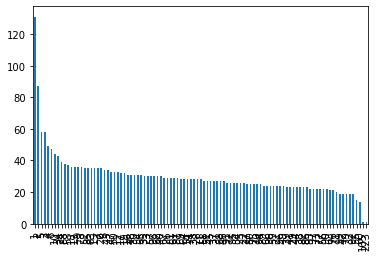

In [68]:
x['Reviews'].value_counts().plot.bar()

In [42]:
u.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       True
1       True
2       True
3       True
4       True
        ... 
3263    True
3264    True
3265    True
3266    True
3267    True
Name: Brand, Length: 3268, dtype: bool>